In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm

from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

plt.style.use('fivethirtyeight')
plt.rc('figure', figsize=(10.0, 5.0))

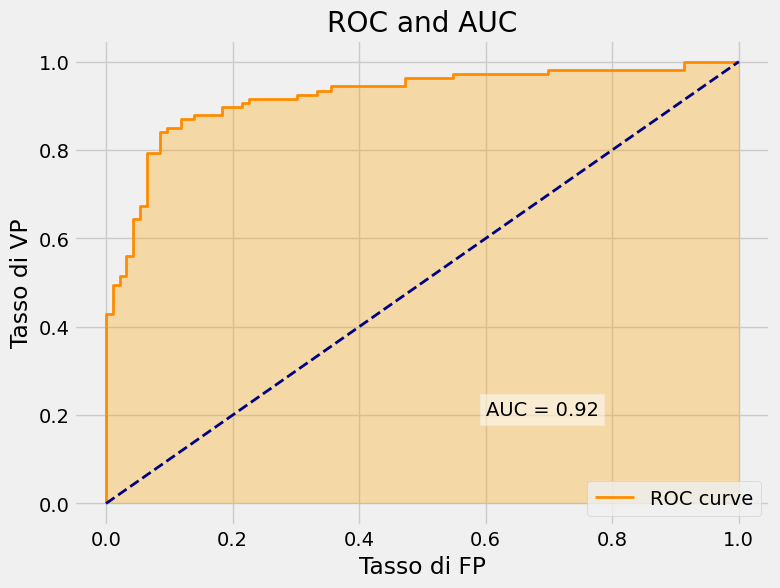

In [2]:
# Generate synthetic data for demonstration purposes
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model (you would replace this with your actual model)
model = LogisticRegression()
model.fit(X_train, y_train)

# Get predicted probabilities for the positive class
y_scores = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve with AUC colored
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.fill_between(fpr, tpr, color='orange', alpha=0.3)  # Color the area under the curve
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasso di FP')
plt.ylabel('Tasso di VP')
plt.title('ROC and AUC')
plt.legend(loc='lower right')

# Display AUC value in the plot
plt.text(0.6, 0.2, 'AUC = {:.2f}'.format(roc_auc), bbox=dict(facecolor='white', alpha=0.5))

plt.savefig('rocauc.svg', dpi=1200)

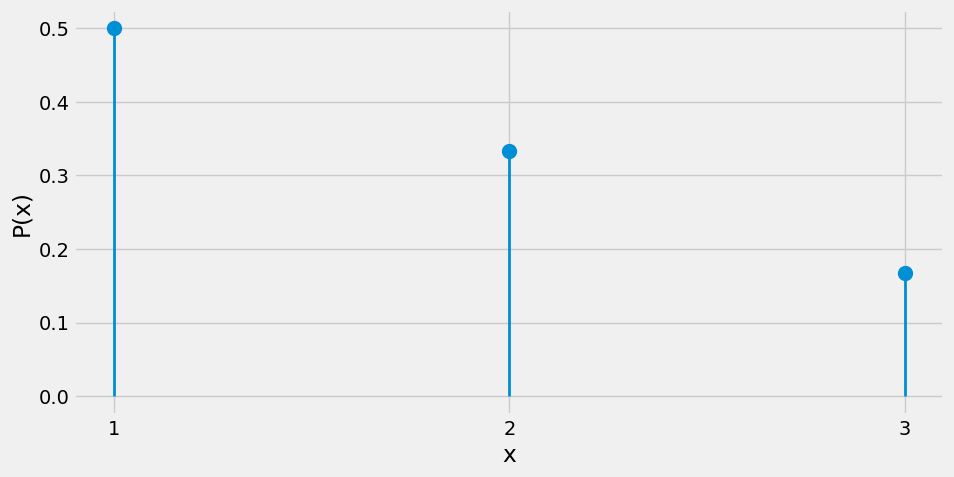

In [3]:
# Data
x_values = [1, 2, 3]
y_values = [1/2, 1/3, 1/6]

# Plotting the vertical lines
plt.plot(x_values, y_values, 'o', markersize=10)
plt.vlines(x=x_values, ymin=0, ymax=y_values, linewidth=2)

# Setting ticks for x-axis and y-axis
plt.xticks(x_values)

# Adding labels and title
plt.xlabel('x')
plt.ylabel('P(x)')

plt.savefig('fdmp.svg', dpi=1200)

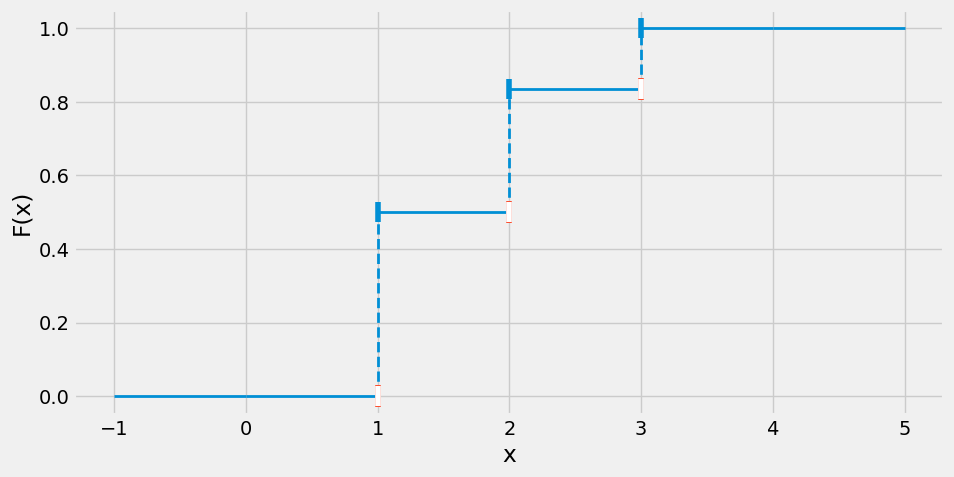

In [4]:
# Data
x_values = [-1, 0, 1, 2, 3, 4, 5]
y_values = [0, 0, 1/2, 5/6, 1, 1]

fig, ax = plt.subplots()
ax.hlines(y=y_values, xmin=x_values[:-1], xmax=x_values[1:], linewidth=2)
ax.vlines(x=x_values[1:-1], ymin=y_values[:-1], ymax=y_values[1:], linestyle='dashed', linewidth=2)
ax.scatter(x_values[2:-2], y_values[2:-1], marker='|', s=200, zorder=2)
ax.scatter(x_values[2:-2], y_values[1:-2], marker='|', s=230, zorder=2)
ax.scatter(x_values[2:-2], y_values[1:-2], marker='|', color='white', s=200, zorder=2)

# Setting ticks for x-axis and y-axis
plt.xticks(x_values)

# Adding labels and title
plt.xlabel('x')
plt.ylabel('F(x)')

plt.savefig('fr.svg', dpi=1200)

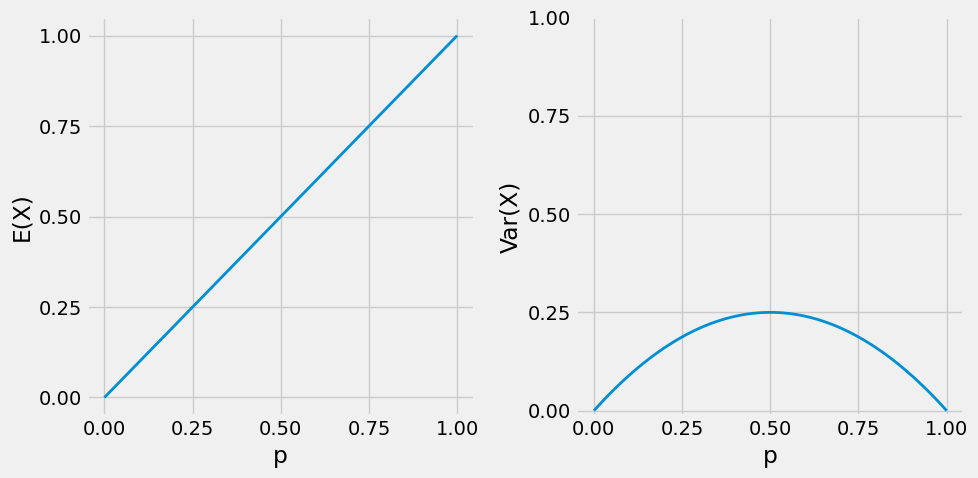

In [5]:
p_values = np.linspace(0, 1, 100)
# Calculate the variance for each value of p
e_values = p_values
v_values = p_values * (1 - p_values)
fig, ax = plt.subplots(ncols=2, gridspec_kw={'width_ratios': [1, 1]})
# Plotting the vertical lines
ax[0].plot(p_values, e_values, linewidth=2)
#ax[0].xticks([0, 1])
ax[1].plot(p_values, v_values, linewidth=2)
#ax[1].xticks([0, 1])

# Adding labels and title
ax[0].set_xlabel('p')
ax[0].set_ylabel('E(X)')
ax[0].set_xticks([0, 0.25, 0.5, 0.75, 1])
ax[0].set_yticks([0, 0.25, 0.5, 0.75, 1])
ax[1].set_xlabel('p')
ax[1].set_ylabel('Var(X)')
ax[1].set_xticks([0, 0.25, 0.5, 0.75, 1])
ax[1].set_yticks([0, 0.25, 0.5, 0.75, 1])

plt.tight_layout()
plt.savefig('bern-ev.svg', dpi=1200)

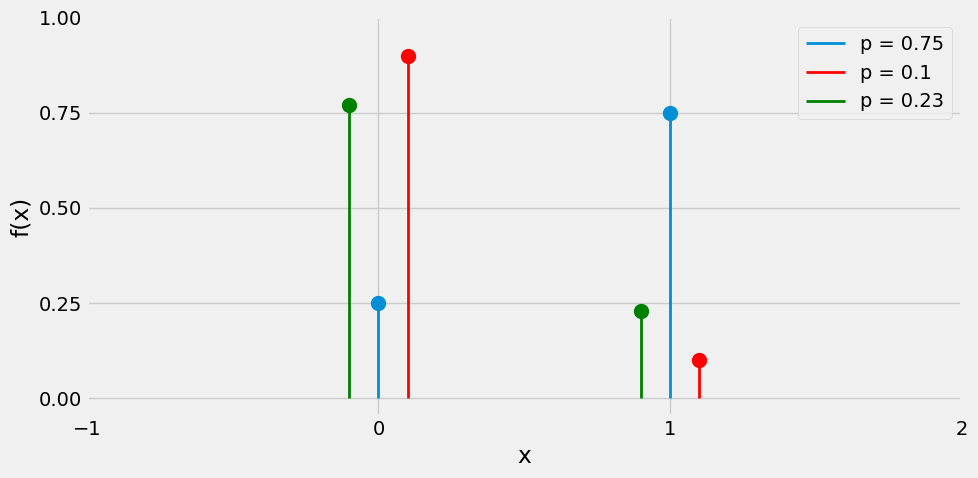

In [6]:
p1 = 0.75
x1 = np.arange(0,2)
p2 = 0.10
x2 = np.arange(0,2)
p3 = 0.23
x3 = np.arange(0,2)
fig, ax = plt.subplots()
# Plotting the vertical lines
ax.vlines(x1, 0, st.bernoulli.pmf(x1, p1), linewidth=2, label=f'p = {p1}')
ax.plot(x1, st.bernoulli.pmf(x1, p1), 'o', markersize=10)
ax.vlines(x2 + 0.1, 0, st.bernoulli.pmf(x2, p2), linewidth=2, label=f'p = {p2}', color='red')
ax.plot(x2 + 0.1, st.bernoulli.pmf(x2, p2), 'o', markersize=10, color='red')
ax.vlines(x3 - 0.1, 0, st.bernoulli.pmf(x3, p3), linewidth=2, label=f'p = {p3}', color='green')
ax.plot(x3 - 0.1, st.bernoulli.pmf(x3, p3), 'o', markersize=10, color='green')
ax.set_xticks([-1, 0, 1, 2])
ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.legend()

plt.tight_layout()
plt.savefig('bern-m.svg', dpi=1200)

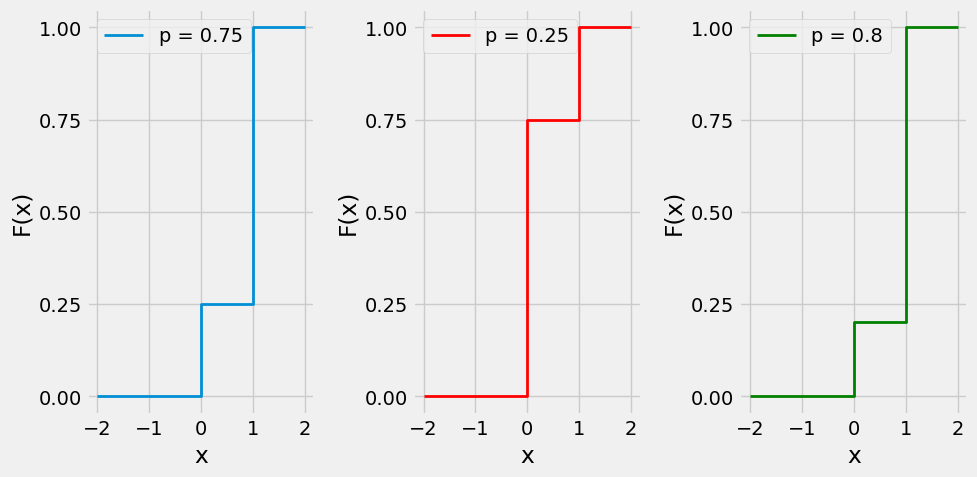

In [7]:
p1 = 0.75
x1 = np.arange(0,3)
p2 = 0.25
x2 = np.arange(0,3)
p3 = 0.80
x3 = np.arange(0,3)
fig, ax = plt.subplots(ncols=3, gridspec_kw={'width_ratios': [1, 1, 1]})
# Plotting the vertical lines
ax[0].step(np.insert(x1, 0, [-2,-1]), np.insert(st.bernoulli.cdf(x1, p1), 0, [0,0]), where='post', linewidth=2, label=f'p = {p1}')
ax[1].step(np.insert(x2, 0, [-2,-1]), np.insert(st.bernoulli.cdf(x2, p2), 0, [0,0]), where='post', linewidth=2, label=f'p = {p2}', color='red')
ax[2].step(np.insert(x3, 0, [-2,-1]), np.insert(st.bernoulli.cdf(x3, p3), 0, [0,0]), where='post', linewidth=2, label=f'p = {p3}', color='green')
ax[0].set_yticks([0, 0.25, 0.5, 0.75, 1])
ax[0].set_xticks([-2, -1, 0, 1, 2])
ax[0].set_xlabel('x')
ax[0].set_ylabel('F(x)')
ax[0].legend()
ax[1].set_yticks([0, 0.25, 0.5, 0.75, 1])
ax[1].set_xticks([-2, -1, 0, 1, 2])
ax[1].set_xlabel('x')
ax[1].set_ylabel('F(x)')
ax[1].legend()
ax[2].set_yticks([0, 0.25, 0.5, 0.75, 1])
ax[2].set_xticks([-2, -1, 0, 1, 2])
ax[2].set_xlabel('x')
ax[2].set_ylabel('F(x)')
ax[2].legend()

plt.tight_layout()
plt.savefig('bern-r.svg', dpi=1200)

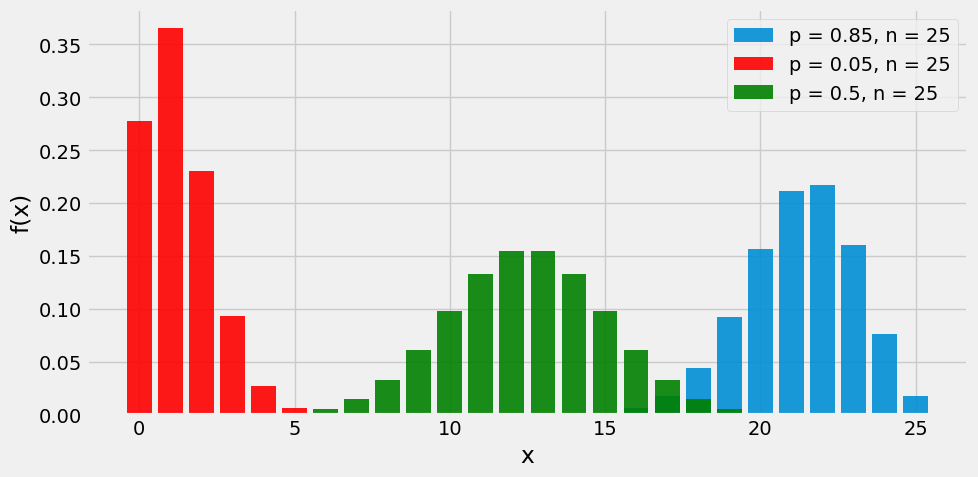

In [8]:
n = 25
p1 = 0.85
x1 = np.arange(0, n+1)
p2 = 0.05
x2 = np.arange(0, n+1)
p3 = 0.50
x3 = np.arange(0, n+1)
fig, ax = plt.subplots()
# Plotting the vertical lines
ax.bar(x1, st.binom.pmf(x1, n, p1), linewidth=2, label=f'p = {p1}, n = {n}', alpha=0.9)
ax.bar(x2, st.binom.pmf(x2, n, p2), linewidth=2, label=f'p = {p2}, n = {n}', color='red', alpha=0.9)
ax.bar(x2, st.binom.pmf(x3, n, p3), linewidth=2, label=f'p = {p3}, n = {n}', color='green', alpha=0.9)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.legend()

plt.tight_layout()
plt.savefig('binom-m.svg', dpi=1200)

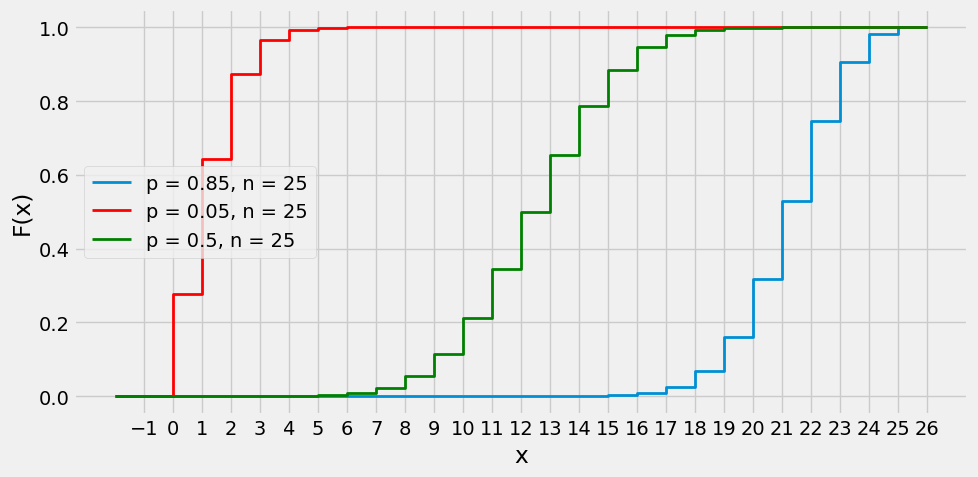

In [9]:
n = 25
p1 = 0.85
x1 = np.arange(0, n+2)
p2 = 0.05
x2 = np.arange(0, n+2)
p3 = 0.50
x3 = np.arange(0, n+2)
fig, ax = plt.subplots()
# Plotting the vertical lines
ax.step(np.insert(x1, 0, [-2,-1]), np.insert(st.binom.cdf(x1, n, p1), 0, [0,0]), where='post', linewidth=2, label=f'p = {p1}, n = {n}')
ax.step(np.insert(x2, 0, [-2,-1]), np.insert(st.binom.cdf(x2, n, p2), 0, [0,0]), where='post', linewidth=2, label=f'p = {p2}, n = {n}', color='red')
ax.step(np.insert(x3, 0, [-2,-1]), np.insert(st.binom.cdf(x3, n, p3), 0, [0,0]), where='post', linewidth=2, label=f'p = {p3}, n = {n}', color='green')
ax.set_xlabel('x')
ax.set_ylabel('F(x)')
ax.set_xticks(range(-1, n+2))
ax.legend()

plt.tight_layout()
plt.savefig('binom-r.svg', dpi=1200)

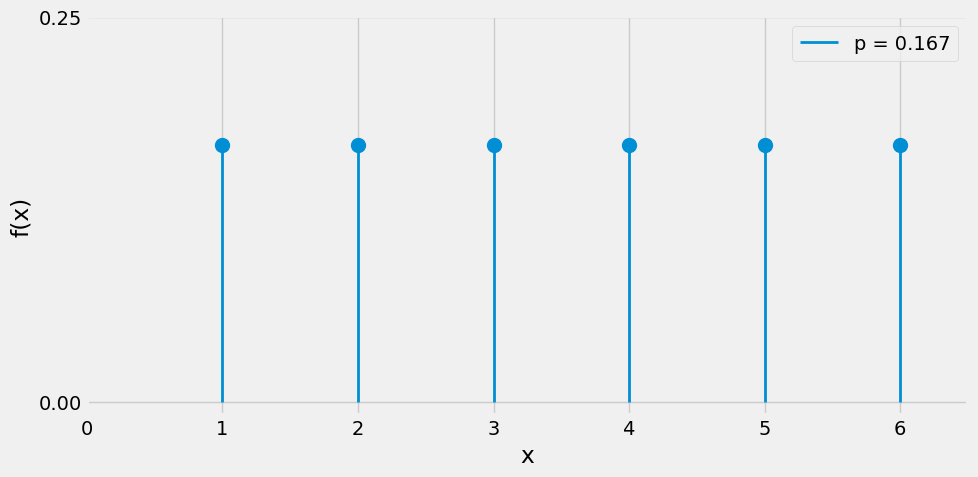

In [10]:
n = 6
x = np.arange(0, n+1)
p = 1 / n

fig, ax = plt.subplots()
# Plotting the vertical lines
ax.vlines(x+1, 0, st.randint.pmf(x, 0, n), linewidth=2, label=f'p = {round(p, 3)}')
ax.plot(x+1, st.randint.pmf(x, 0, n), 'o', markersize=10)
ax.set_xticks(x)
ax.set_xlim([0, n + 0.5])
ax.set_yticks([0, 0.25])
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.legend()

plt.tight_layout()
plt.savefig('unifd-m.svg', dpi=1200)

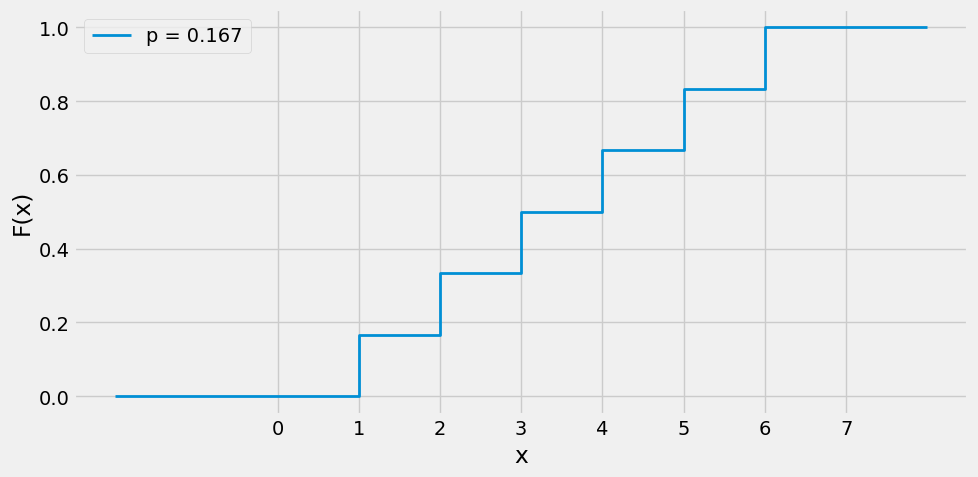

In [11]:
n = 6
x = np.arange(0, n+2)
p = 1 / n

fig, ax = plt.subplots()
ax.step(np.insert(x+1, 0, [-2,-1]), np.insert(st.randint.cdf(x, 0, n), 0, [0,0]), where='post', linewidth=2, label=f'p = {round(p, 3)}')
ax.set_xticks(x)
ax.set_xlabel('x')
ax.set_ylabel('F(x)')
ax.legend()

plt.tight_layout()
plt.savefig('unifd-r.svg', dpi=1200)

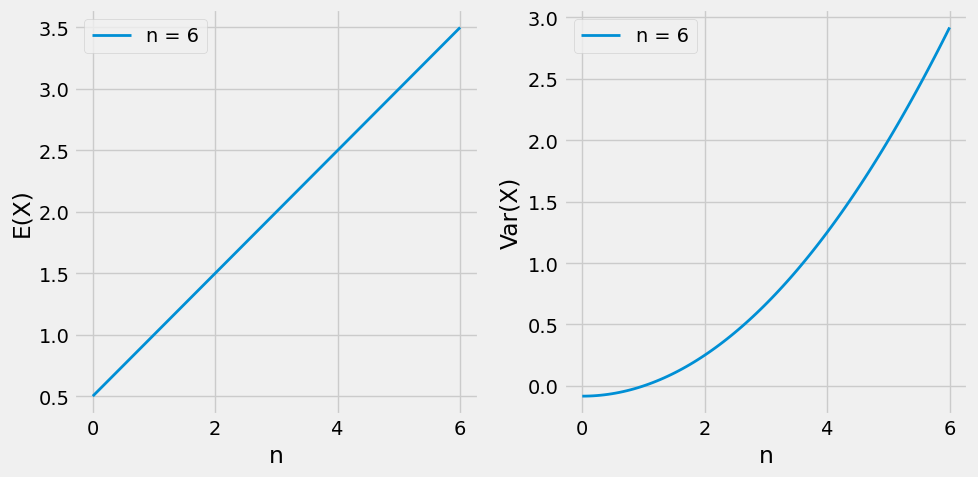

In [12]:
p_values = np.linspace(0, 6, 100)
# Calculate the variance for each value of p
e_values = (p_values + 1) / 2
v_values = ((p_values * p_values) - 1) / 12
fig, ax = plt.subplots(ncols=2, gridspec_kw={'width_ratios': [1, 1]})
# Plotting the vertical lines
ax[0].plot(p_values, e_values, linewidth=2, label=f'n = 6')
ax[1].plot(p_values, v_values, linewidth=2, label=f'n = 6')

# Adding labels and title
ax[0].set_xlabel('n')
ax[0].set_ylabel('E(X)')
ax[1].set_xlabel('n')
ax[1].set_ylabel('Var(X)')
ax[0].legend()
ax[1].legend()

plt.tight_layout()
plt.savefig('unifd-ev.svg', dpi=1200)

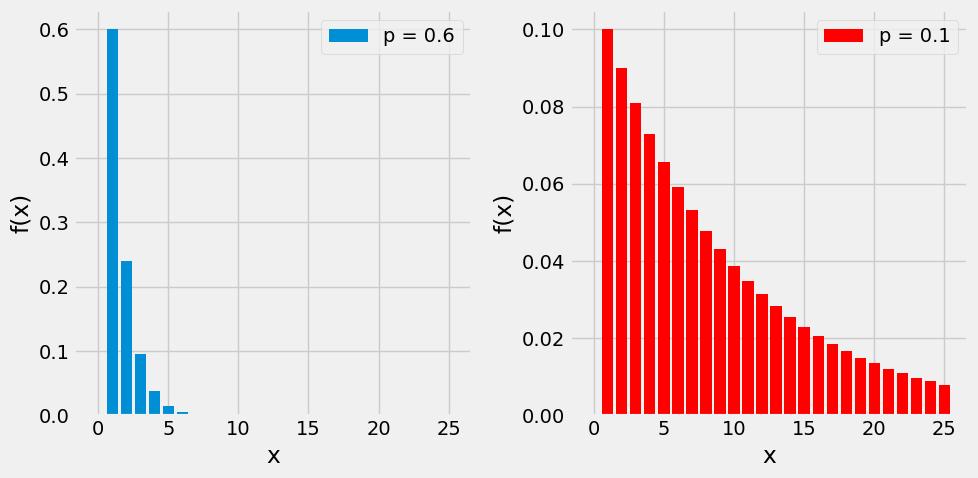

In [13]:
n = 25
p1 = 0.6
x1 = np.arange(0, n+1)
p2 = 0.1
x2 = np.arange(0, n+1)
fig, ax = plt.subplots(ncols=2)
# Plotting the vertical lines
ax[0].bar(x1, st.geom.pmf(x1, p1), linewidth=2, label=f'p = {p1}')
ax[1].bar(x2, st.geom.pmf(x2, p2), linewidth=2, label=f'p = {p2}', color='red')
ax[0].set_xlabel('x')
ax[0].set_ylabel('f(x)')
ax[0].legend()
ax[1].set_xlabel('x')
ax[1].set_ylabel('f(x)')
ax[1].legend()

plt.tight_layout()
plt.savefig('geom-m.svg', dpi=1200)

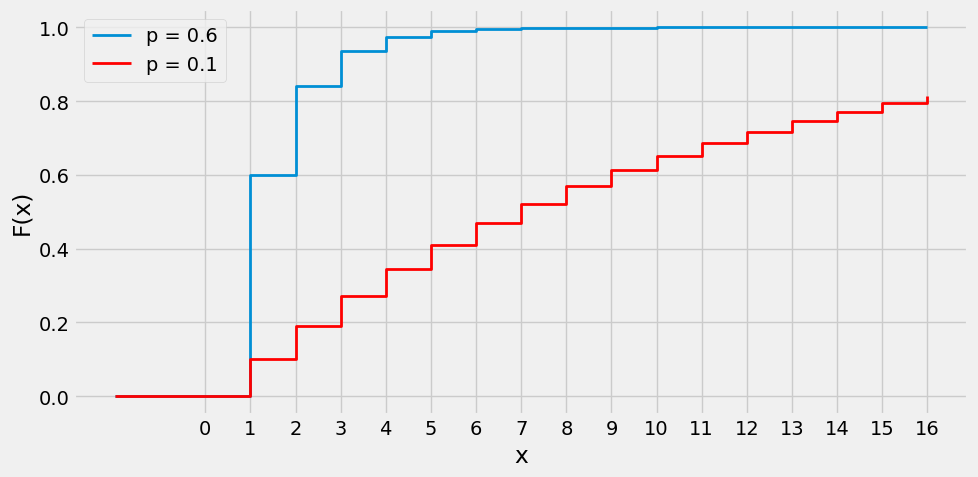

In [14]:
n = 15
x = np.arange(0, n + 2)

fig, ax = plt.subplots()
ax.step(np.insert(x, 0, [-2,-1]), np.insert(st.geom.cdf(x, 0.6), 0, [0,0]), where='post', linewidth=2, label=f'p = 0.6')
ax.step(np.insert(x, 0, [-2,-1]), np.insert(st.geom.cdf(x, 0.1), 0, [0,0]), where='post', linewidth=2, label=f'p = 0.1', color='red')
ax.set_xticks(x)
ax.set_xlabel('x')
ax.set_ylabel('F(x)')
ax.legend()

plt.tight_layout()
plt.savefig('geom-r.svg', dpi=1200)

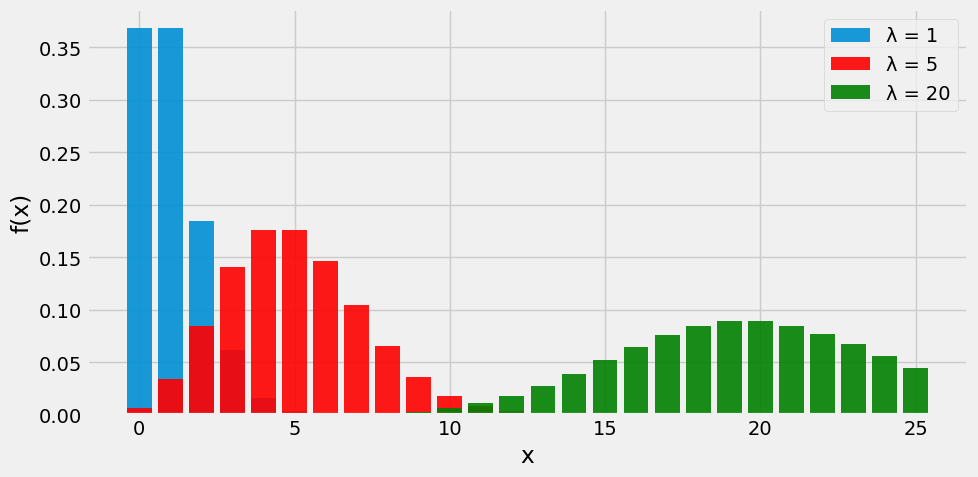

In [30]:
n = 25
p1 = 1
x1 = np.arange(0, n+1)
p2 = 5
x2 = np.arange(0, n+1)
p3 = 20
x3 = np.arange(0, n+1)
fig, ax = plt.subplots()
# Plotting the vertical lines
ax.bar(x1, st.poisson.pmf(x1, p1), linewidth=2, label=f'λ = {p1}', alpha=0.9)
ax.bar(x2, st.poisson.pmf(x2, p2), linewidth=2, label=f'λ = {p2}', color='red', alpha=0.9)
ax.bar(x3, st.poisson.pmf(x3, p3), linewidth=2, label=f'λ = {p3}', color='green', alpha=0.9)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.legend()

plt.tight_layout()
plt.savefig('poiss-m.svg', dpi=1200)

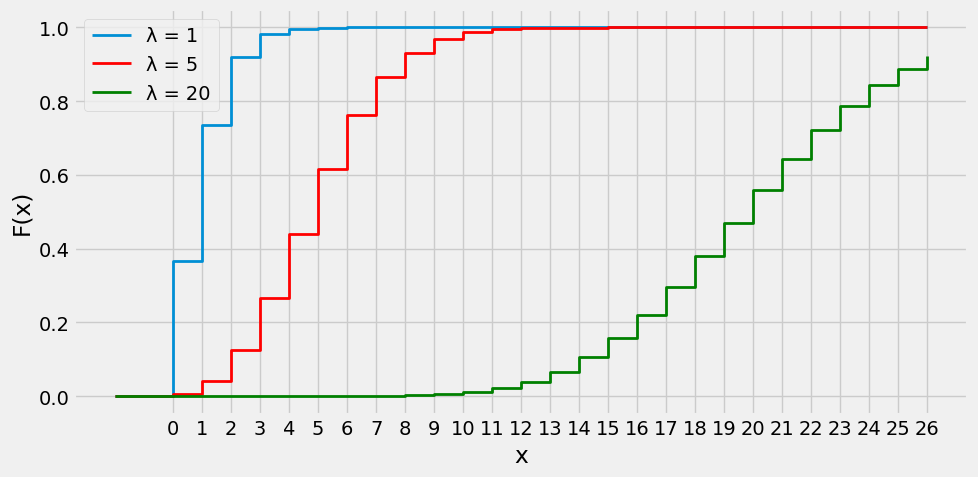

In [31]:
n = 25
x = np.arange(0, n + 2)

fig, ax = plt.subplots()
ax.step(np.insert(x, 0, [-2,-1]), np.insert(st.poisson.cdf(x, 1), 0, [0,0]), where='post', linewidth=2, label=f'λ = 1')
ax.step(np.insert(x, 0, [-2,-1]), np.insert(st.poisson.cdf(x, 5), 0, [0,0]), where='post', linewidth=2, label=f'λ = 5', color='red')
ax.step(np.insert(x, 0, [-2,-1]), np.insert(st.poisson.cdf(x, 20), 0, [0,0]), where='post', linewidth=2, label=f'λ = 20', color='green')
ax.set_xticks(x)
ax.set_xlabel('x')
ax.set_ylabel('F(x)')
ax.legend()

plt.tight_layout()
plt.savefig('poiss-r.svg', dpi=1200)

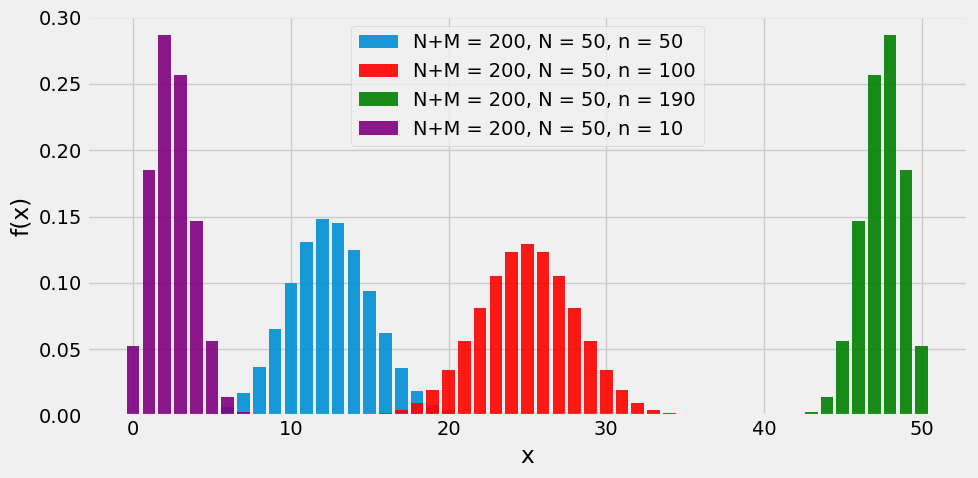

In [17]:
n = 200 # totale oggetti
ogg = 50 # totale oggetti funzionanti
x1 = np.arange(0, ogg + 1)
x2 = np.arange(0, ogg + 1)
x3 = np.arange(0, ogg + 1)
x4 = np.arange(0, ogg + 1)
[M1, n1, N1] = [n, ogg, 50]
[M2, n2, N2] = [n, ogg, 100]
[M3, n3, N3] = [n, ogg, 190]
[M4, n4, N4] = [n, ogg, 10]
fig, ax = plt.subplots()
# Plotting the vertical lines
ax.bar(x1, st.hypergeom.pmf(x1, M1, n1, N1), linewidth=2, label=f'N+M = {n}, N = {ogg}, n = 50', alpha=0.9)
ax.bar(x2, st.hypergeom.pmf(x2, M2, n2, N2), linewidth=2, label=f'N+M = {n}, N = {ogg}, n = 100', color='red', alpha=0.9)
ax.bar(x3, st.hypergeom.pmf(x3, M3, n3, N3), linewidth=2, label=f'N+M = {n}, N = {ogg}, n = 190', color='green', alpha=0.9)
ax.bar(x3, st.hypergeom.pmf(x4, M4, n4, N4), linewidth=2, label=f'N+M = {n}, N = {ogg}, n = 10', color='purple', alpha=0.9)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.legend()

plt.tight_layout()
plt.savefig('hyper-m.svg', dpi=1200)

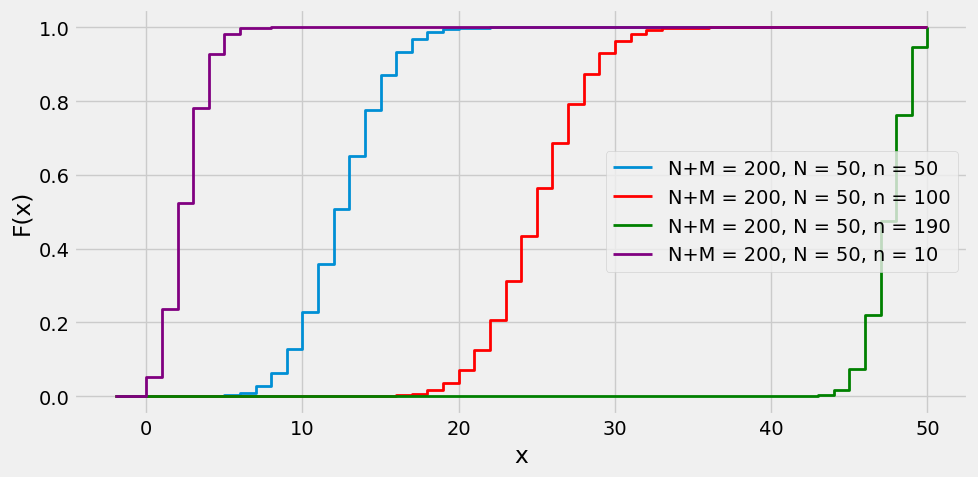

In [18]:
n = 200 # totale oggetti
ogg = 50 # totale oggetti funzionanti
x1 = np.arange(0, ogg + 1)
x2 = np.arange(0, ogg + 1)
x3 = np.arange(0, ogg + 1)
x4 = np.arange(0, ogg + 1)
[M1, n1, N1] = [n, ogg, 50]
[M2, n2, N2] = [n, ogg, 100]
[M3, n3, N3] = [n, ogg, 190]
[M4, n4, N4] = [n, ogg, 10]
fig, ax = plt.subplots()
ax.step(np.insert(x1, 0, [-2,-1]), np.insert(st.hypergeom.cdf(x1, M1, n1, N1), 0, [0,0]), where='post', linewidth=2, label=f'N+M = {n}, N = {ogg}, n = 50')
ax.step(np.insert(x2, 0, [-2,-1]), np.insert(st.hypergeom.cdf(x2, M2, n2, N2), 0, [0,0]), where='post', linewidth=2, label=f'N+M = {n}, N = {ogg}, n = 100', color='red')
ax.step(np.insert(x3, 0, [-2,-1]), np.insert(st.hypergeom.cdf(x3, M3, n3, N3), 0, [0,0]), where='post', linewidth=2, label=f'N+M = {n}, N = {ogg}, n = 190', color='green')
ax.step(np.insert(x4, 0, [-2,-1]), np.insert(st.hypergeom.cdf(x4, M4, n4, N4), 0, [0,0]), where='post', linewidth=2, label=f'N+M = {n}, N = {ogg}, n = 10', color='purple')
ax.set_xlabel('x')
ax.set_ylabel('F(x)')
ax.legend()

plt.tight_layout()
plt.savefig('hyper-r.svg', dpi=1200)

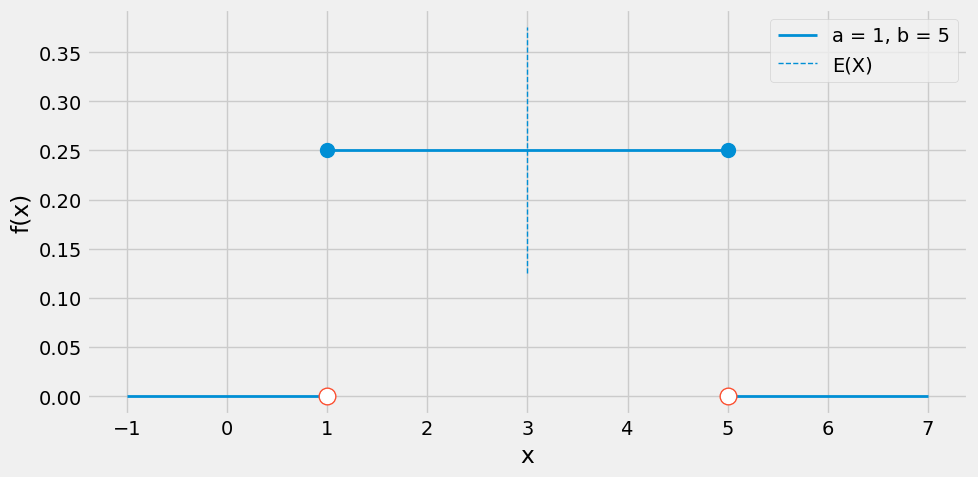

In [19]:
a = 1
b = 5
y = 1 / (b - a)
fig, ax = plt.subplots()
# Plotting the vertical lines
ax.hlines(y=y, xmin=a, xmax=b, linewidth=2, label=f'a = {a}, b = {b}')
ax.hlines(y=0, xmin=a-2, xmax=a, linewidth=2)
ax.hlines(y=0, xmin=b, xmax=b+2, linewidth=2)
ax.plot([a,b], [y,y], 'o', markersize=10)
ax.plot([a,b], [0,0], 'o', markersize=12)
ax.plot([a,b], [0,0], 'o', markersize=10, color='white')
ax.vlines(x=(b-a)/2 + 1, ymin=0 + y/2, ymax=y + y/2, linestyles='dashed', linewidth=1, label=f'E(X)')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.legend()

plt.tight_layout()
plt.savefig('unifc-d.svg', dpi=1200)

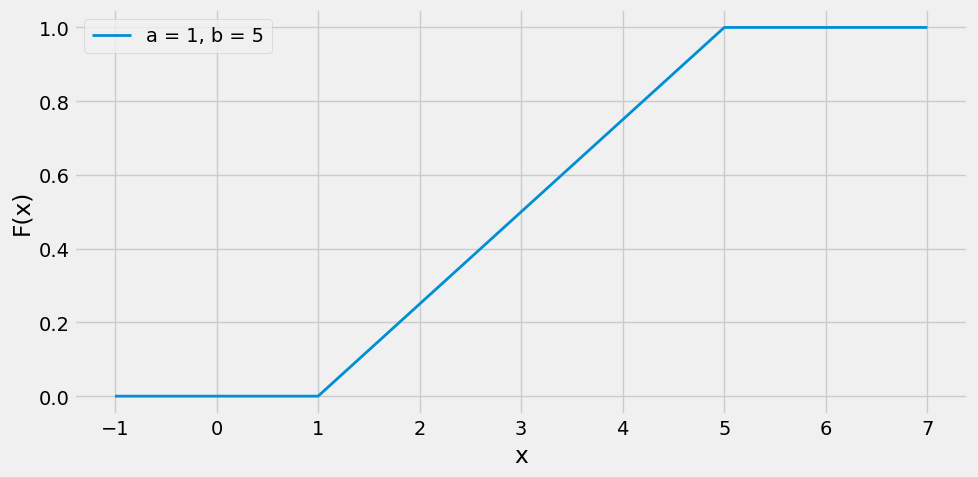

In [20]:
a = 1
b = 5
x = np.linspace(a, b, 100)
x1 = np.linspace(a-2, a, 100)
y1 = [0 for i in range(0, 100)]
x2 = np.linspace(b, b+2, 100)
y2 = [1 for i in range(0, 100)]
y = (x - a) / (b - a)

x = np.insert(x, 0, x1)
x = np.append(x, x2)
y = np.insert(y, 0, y1)
y = np.append(y, y2)

fig, ax = plt.subplots()
# Plotting the vertical lines
ax.plot(x, y, linewidth=2, label=f'a = {a}, b = {b}')
ax.set_xlabel('x')
ax.set_ylabel('F(x)')
ax.legend()

plt.tight_layout()
plt.savefig('unifc-r.svg', dpi=1200)

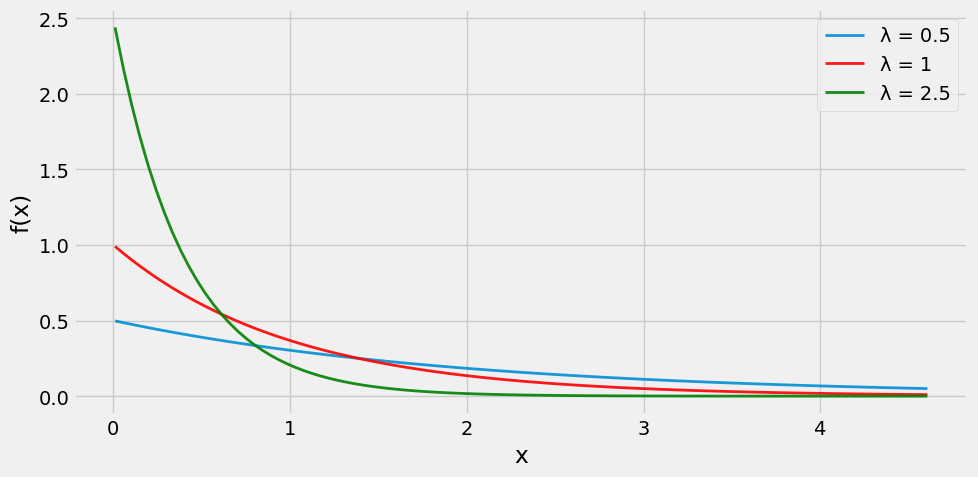

In [21]:
x = np.linspace(st.expon.ppf(0.01), st.expon.ppf(0.99), 100)
p1 = 0.5
p2 = 1
p3 = 2.5
fig, ax = plt.subplots()
# Plotting the vertical lines
ax.plot(x, p1 * np.exp(1) ** ((p1 * -1) * x), linewidth=2, label=f'λ = {p1}', alpha=0.9)
ax.plot(x, p2 * np.exp(1) ** ((p2 * -1) * x), linewidth=2, label=f'λ = {p2}', color='red', alpha=0.9)
ax.plot(x, p3 * np.exp(1) ** ((p3 * -1) * x), linewidth=2, label=f'λ = {p3}', color='green', alpha=0.9)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.legend()

plt.tight_layout()
plt.savefig('expon-d.svg', dpi=1200)

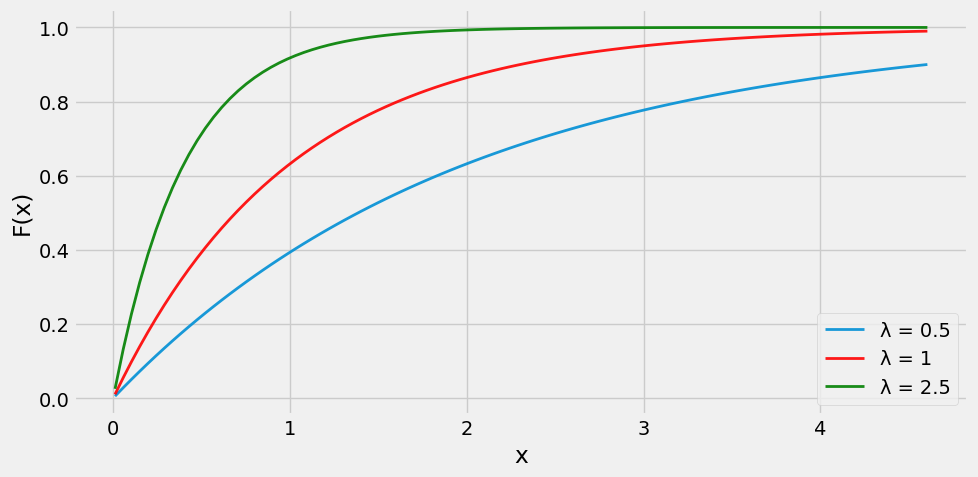

In [22]:
x = np.linspace(st.expon.ppf(0.01), st.expon.ppf(0.99), 100)
p1 = 0.5
p2 = 1
p3 = 2.5
fig, ax = plt.subplots()
# Plotting the vertical lines
ax.plot(x, (1 - np.exp(1) ** ((p1 * -1) * x)), linewidth=2, label=f'λ = {p1}', alpha=0.9)
ax.plot(x, (1 - np.exp(1) ** ((p2 * -1) * x)), linewidth=2, label=f'λ = {p2}', color='red', alpha=0.9)
ax.plot(x, (1 - np.exp(1) ** ((p3 * -1) * x)), linewidth=2, label=f'λ = {p3}', color='green', alpha=0.9)
ax.set_xlabel('x')
ax.set_ylabel('F(x)')
ax.legend()

plt.tight_layout()
plt.savefig('expon-r.svg', dpi=1200)

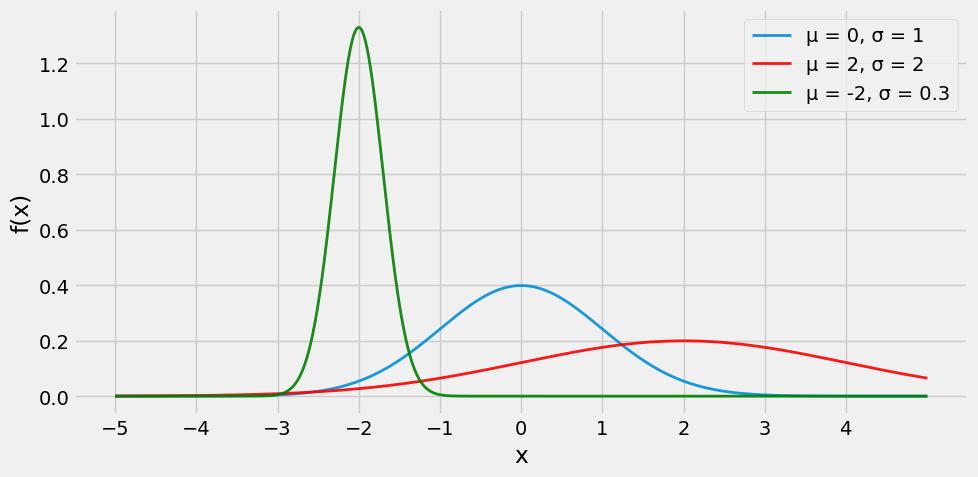

In [23]:
x = np.linspace(-5, 5, 1000)
mu1 = 0
mu2 = 2
mu3 = -2
sigma1 = 1
sigma2 = 2
sigma3 = 0.3
fig, ax = plt.subplots()
# Plotting the vertical lines
ax.plot(x, st.norm.pdf(x, mu1, sigma1), linewidth=2, label=f'μ = {mu1}, σ = {sigma1}', alpha=0.9)
ax.plot(x, st.norm.pdf(x, mu2, sigma2), linewidth=2, label=f'μ = {mu2}, σ = {sigma2}', color='red', alpha=0.9)
ax.plot(x, st.norm.pdf(x, mu3, sigma3), linewidth=2, label=f'μ = {mu3}, σ = {sigma3}', color='green', alpha=0.9)
ax.set_xticks(range(-5, 5))
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.legend()

plt.tight_layout()
plt.savefig('norm-d.svg', dpi=1200)

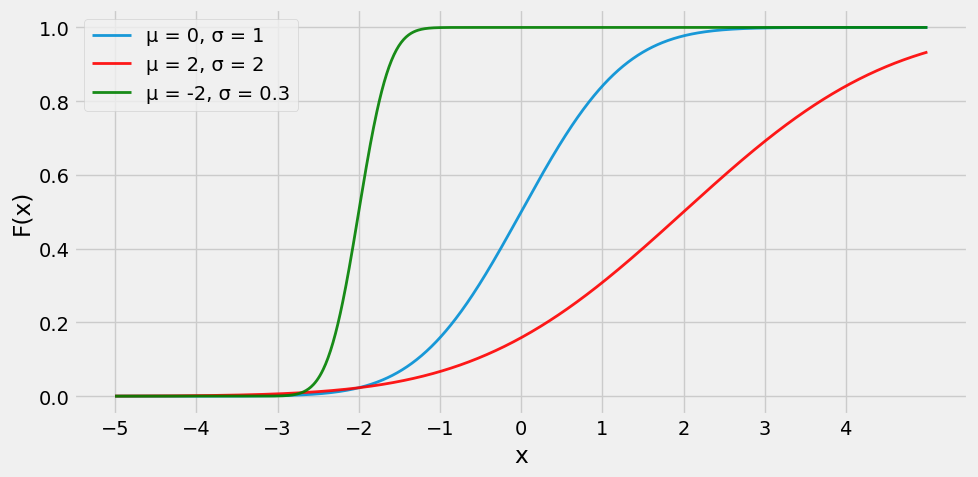

In [24]:
x = np.linspace(-5, 5, 1000)
mu1 = 0
mu2 = 2
mu3 = -2
sigma1 = 1
sigma2 = 2
sigma3 = 0.3
fig, ax = plt.subplots()
# Plotting the vertical lines
ax.plot(x, st.norm.cdf(x, mu1, sigma1), linewidth=2, label=f'μ = {mu1}, σ = {sigma1}', alpha=0.9)
ax.plot(x, st.norm.cdf(x, mu2, sigma2), linewidth=2, label=f'μ = {mu2}, σ = {sigma2}', color='red', alpha=0.9)
ax.plot(x, st.norm.cdf(x, mu3, sigma3), linewidth=2, label=f'μ = {mu3}, σ = {sigma3}', color='green', alpha=0.9)
ax.set_xticks(range(-5, 5))
ax.set_xlabel('x')
ax.set_ylabel('F(x)')
ax.legend()

plt.tight_layout()
plt.savefig('norm-r.svg', dpi=1200)

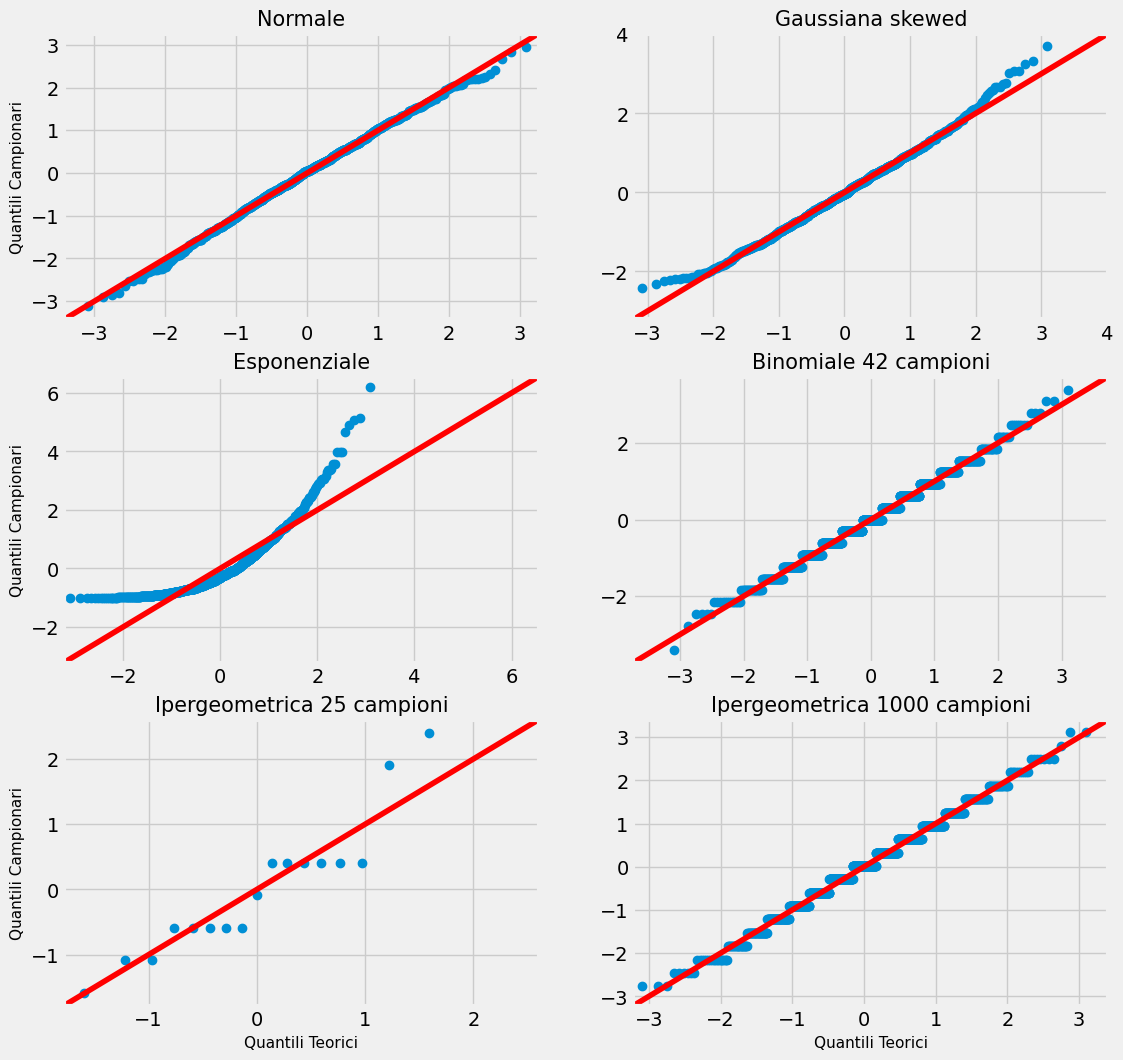

In [25]:
m1 = np.random.normal(0, 1, 1000)
m11 = np.random.normal(50, 0.01, 1000)
m2 = np.random.exponential(1.5, 1000)
m3 = np.random.binomial(42, 0.5, 1000)
m4 = np.random.hypergeometric(200, 50, 100, 17)
m5 = np.random.hypergeometric(200, 50, 100, 1000)

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
sm.qqplot(m1, fit=True, line='45', ax=ax[0,0])
sm.qqplot(m11, fit=True, line='45', ax=ax[0,1])
sm.qqplot(m2, fit=True, line='45', ax=ax[1,0])
sm.qqplot(m3, fit=True, line='45', ax=ax[1,1])
sm.qqplot(m4, fit=True, line='45', ax=ax[2,0])
sm.qqplot(m5, fit=True, line='45', ax=ax[2,1])
ax[0,0].set_title('Normale', fontsize=15)
ax[0,1].set_title('Gaussiana skewed', fontsize=15)
ax[1,0].set_title('Esponenziale', fontsize=15)
ax[1,1].set_title('Binomiale 42 campioni', fontsize=15)
ax[2,0].set_title('Ipergeometrica 25 campioni', fontsize=15)
ax[2,1].set_title('Ipergeometrica 1000 campioni', fontsize=15)
ax[0,0].set_xlabel('')
ax[0,1].set_xlabel('')
ax[1,0].set_xlabel('')
ax[1,1].set_xlabel('')
ax[0,1].set_ylabel('')
ax[1,1].set_ylabel('')
ax[2,1].set_ylabel('')
ax[2,0].set_xlabel('Quantili Teorici', fontsize=11)
ax[2,1].set_xlabel('Quantili Teorici', fontsize=11)
ax[0,0].set_ylabel('Quantili Campionari', fontsize=11)
ax[1,0].set_ylabel('Quantili Campionari', fontsize=11)
ax[2,0].set_ylabel('Quantili Campionari', fontsize=11)

plt.savefig('quant-2.svg', dpi=1200)

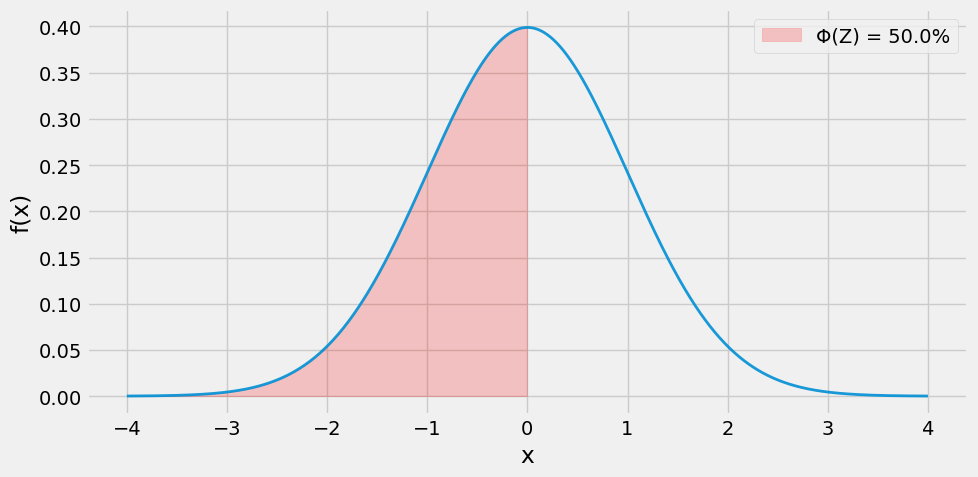

In [58]:
x = np.linspace(-4, 4, 1000)
quant_val = 0.50
quant = np.quantile(x, quant_val)
x1 = [i for i in x if i <= quant]
mu = 0
sigma = 1
y = st.norm.pdf(x, mu, sigma)
y1 = st.norm.pdf(x1, mu, sigma)
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=2, alpha=0.9)
ax.fill_between(x1, y1, color='red', alpha=0.2, label=f'Φ(Z) = {st.norm.cdf(st.norm.ppf(quant_val)) * 100}%')
ax.set_xticks(range(-4, 5))
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.legend()
plt.tight_layout()
plt.savefig('quant-1.svg', dpi=1200)